# Predicting Heart Disease
The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year. There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

In this project, we'll be working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether they have had heart disease before.

**GOAL** : *We will use the dataset to accurately predict the likelihood of a new patient having heart disease in the future.*

The dataset has the following features:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

We'll begin by conducting exploratory data analysis on the dataset.

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('heart_disease_prediction.csv')
df.shape

(918, 12)

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### EDA: Descriptive Statistics
We can see from the dataframe preview that we have categorical and numerical features in the dataset. If we explore further, we'll see that a couple of columns -- FastingBS and HeartDisease -- have the dtype int64, but are also categorical variables, since they only take the values 0 and 1.

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


From the summary statistics above, we can note the following:
* The average age of patients in the dataset is 53.5.
* The median cholesterol figure is higher than the mean implying a left-skewed distribution.
* A number of numerical features have min values of 0, including RestingBP and Cholesterol. Let's check to see if this reflects the existence of missing values in the dataset.

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There seems to be no missing values in the dataset.

### EDA: Visualizations
A few observations stand out from the descriptive statistics above:
* RestingBP is unlikely to be zero.
* Cholesterol is also unlikely to be zero.

From the dataset description, Cholesterol contains the serum cholesterol values. According to the American Heart Association, serum cholesterol is a composite of different measurements. Total blood cholesterol is calculated by adding HDL and LDL cholesterol levels, plus 20% of triglyceride level. These calculations generally imply that a 0 value for serum cholesterol is unlikely.

We'll now explore the distributions within the categorical features in the dataset, using visualizations to understand how the data is distributed.

In order to determine categorical features, we'll analyze the summary statistics using the df.describe() method with the 'include' parameter set to 'all'. All features reflected in unique, top, and freq indexes are categorical variables. We'll also consider categorical variables that have been one hot encoded.

In [8]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [9]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'HeartDisease']

categorical_xlabels = ['Gender', 'Types of Chest Pain', 'Fasting Blood Sugar (High/Low)', 'Resting Electrocardiogram Results', 'Exercise-Induced Angina', 'Heart Disease (Y/N)']

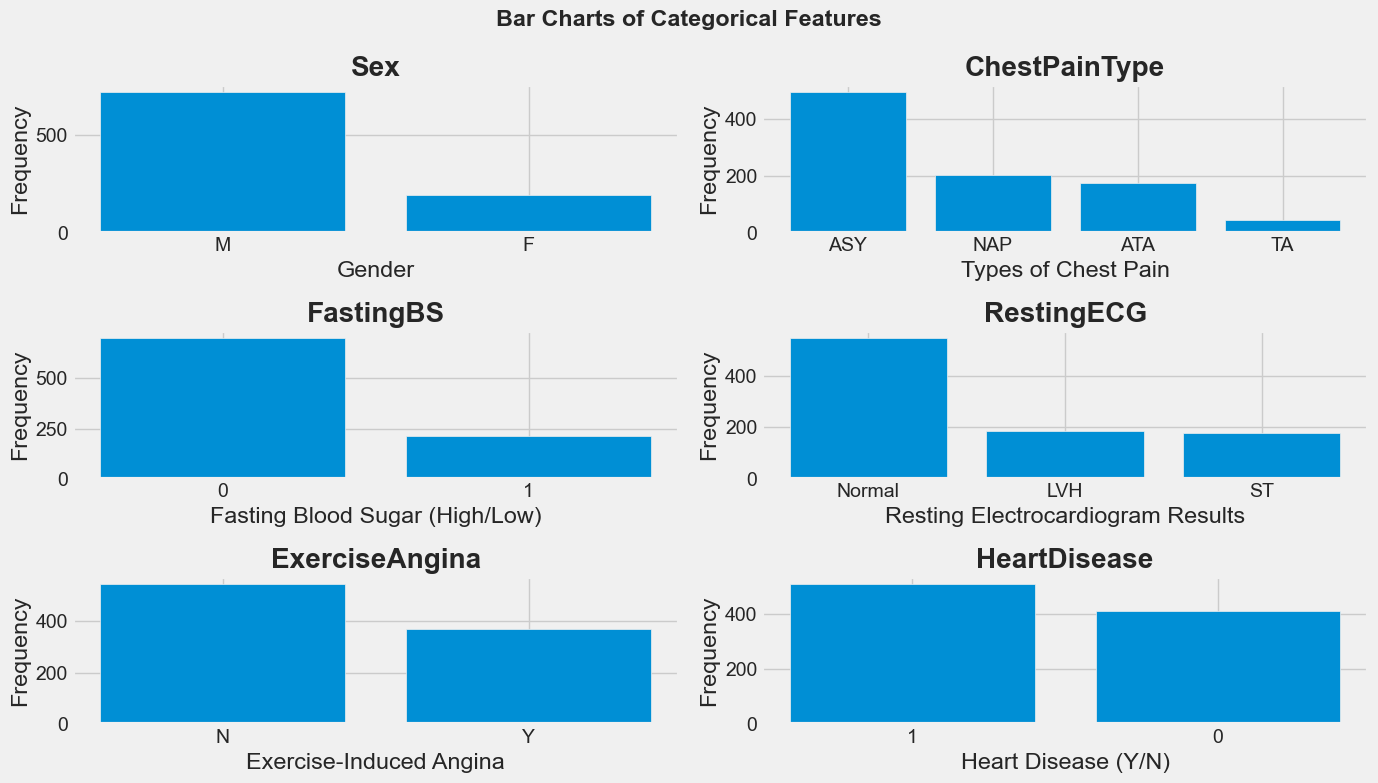

In [10]:
style.use('fivethirtyeight')
plt.figure(figsize=(14,8))
plot_num = list(range(0,6))

for num in plot_num:
    plt.subplot(3, 2, num+1)
    plt.bar(df[categorical_features[num]].value_counts().index.astype(str),
            df[categorical_features[num]].value_counts())
    plt.xlabel(categorical_xlabels[num])
    plt.ylabel('Frequency')
    plt.title(f'{categorical_features[num]}', weight='bold')


plt.suptitle(t='Bar Charts of Categorical Features', weight='bold')
plt.tight_layout()
plt.show()

From the bar charts of categorical features, we notice the following:
* There are significantly more males than females in the dataset.
* Asymptomatic chest pain (ASY) is the most popular form of chest pain in the dataset.
* Most individuals in the dataset have a fasting blood sugar below 120mg/dl.
* The normal resting ECG rate is the most popular in the dataset.
* Fewer people in the dataset have had an exercise-induced angina. Although the difference is not as significant as in other categorical distributions.
* More people in the dataset have had heart disease, although the spread seems close to even (possibly 55:45).

We'll now create bar chart visuals displaying the relationship between heart disease and other categorical variables.

We'll use the pd.crosstab() function to compare how each categorical feature is grouped against heart disease. We'll make our comparisons using counts and percentages.

In [11]:
df['Sex'].value_counts(normalize=True) * 100

M    78.976035
F    21.023965
Name: Sex, dtype: float64

In [12]:
df[categorical_features].groupby('HeartDisease').agg('count')

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina
HeartDisease,,,,,
0,410,410,410,410,410
1,508,508,508,508,508


In [13]:
pd.crosstab(df['HeartDisease'], df['Sex'])

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


In [14]:
pd.crosstab(df['HeartDisease'], df['Sex'], normalize=True) * 100

Sex,F,M
HeartDisease,,
0,15.577342,29.084967
1,5.446623,49.891068


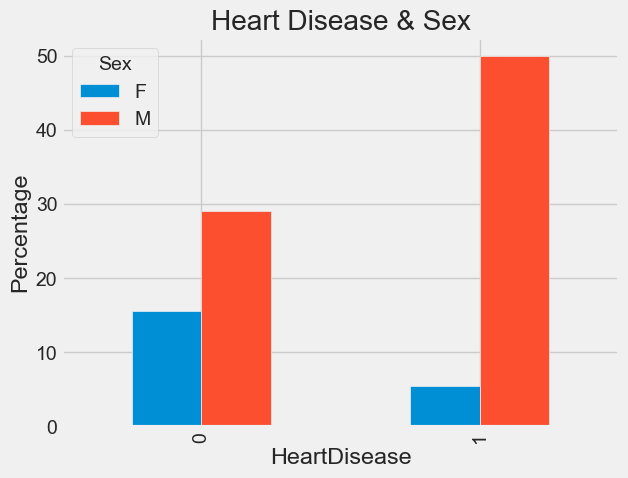

In [15]:
(pd.crosstab(df['HeartDisease'], df['Sex'], normalize=True) * 100).plot.bar()
plt.ylabel('Percentage')
plt.title('Heart Disease & Sex')
plt.show()

We've seen earlier that males are overrepresented in the dataset, and the sex feature is distributed 79:21 in favour of men. With regard to Heart Disease, men are overrepresented as well, i.e. 50:5.

This means that men are 10 times as likely as women to suffer from heart disease.

ChestPainType  ASY  ATA  NAP  TA
HeartDisease                    
0              104  149  131  26
1              392   24   72  20
ChestPainType        ASY        ATA        NAP        TA
HeartDisease                                            
0              11.328976  16.230937  14.270153  2.832244
1              42.701525   2.614379   7.843137  2.178649


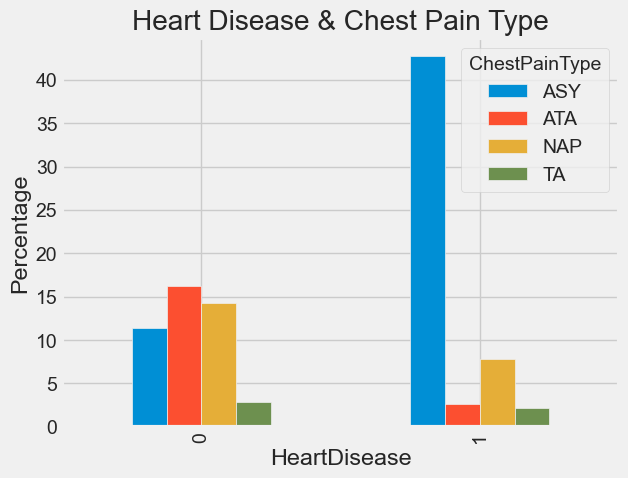

In [16]:
print(pd.crosstab(df['HeartDisease'], df['ChestPainType']))
print(pd.crosstab(df['HeartDisease'], df['ChestPainType'], normalize=True) * 100)

(pd.crosstab(df['HeartDisease'], df['ChestPainType'], normalize=True) * 100).plot.bar()
plt.ylabel('Percentage')
plt.title('Heart Disease & Chest Pain Type')
plt.show()

Four types of chest pain types are represented in the dataset: ASY (Asymptomatic). ATA (Atypical Angina), NAP(Non-Anginal Pain), and ASY(Asymptomatic).

For records with Heart Disease, there is a higher likelihood of asymptomatic chest pain (42%) and a much lower likelihood of the other types of chest pains (between 2-7%).

FastingBS       0    1
HeartDisease          
0             366   44
1             338  170
FastingBS             0          1
HeartDisease                      
0             39.869281   4.793028
1             36.819172  18.518519


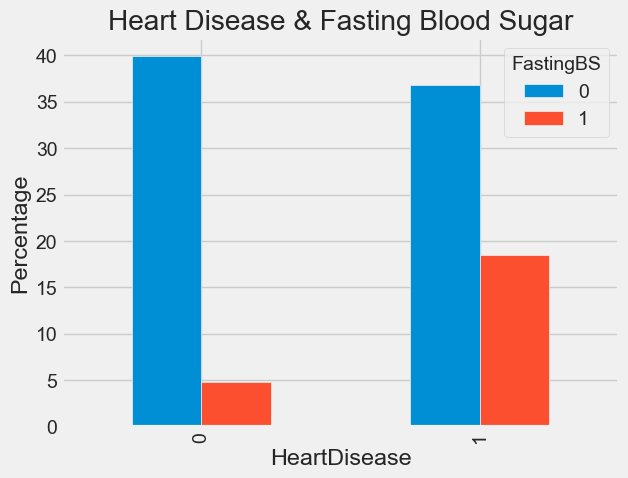

In [17]:
print(pd.crosstab(df['HeartDisease'], df['FastingBS']))
print(pd.crosstab(df['HeartDisease'], df['FastingBS'], normalize=True) * 100)

(pd.crosstab(df['HeartDisease'], df['FastingBS'], normalize=True) * 100).plot.bar()
plt.ylabel('Percentage')
plt.title('Heart Disease & Fasting Blood Sugar')
plt.show()

Generally, patients with our without heart disease have low fasting blood sugar. However, for those with a high Fasting BS, those with heart disease have a higher Fasting BS than those without.

RestingECG    LVH  Normal   ST
HeartDisease                  
0              82     267   61
1             106     285  117
RestingECG          LVH     Normal         ST
HeartDisease                                 
0              8.932462  29.084967   6.644880
1             11.546841  31.045752  12.745098


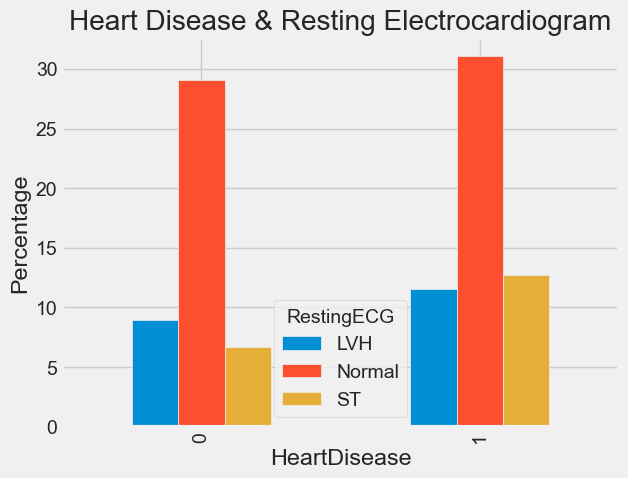

In [18]:
print(pd.crosstab(df['HeartDisease'], df['RestingECG']))
print(pd.crosstab(df['HeartDisease'], df['RestingECG'], normalize=True) * 100)

(pd.crosstab(df['HeartDisease'], df['RestingECG'], normalize=True) * 100).plot.bar()
plt.ylabel('Percentage')
plt.title('Heart Disease & Resting Electrocardiogram')
plt.show()

From the chart, Resting ECG may not be a useful feature in predicting heart disease. Only in cases in ST Resting ECG (T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)), is there a clear difference between records with heart disease and records without.

Records with heart disease are twice as likely to have ST RestingECG than records without.

ExerciseAngina    N    Y
HeartDisease            
0               355   55
1               192  316
ExerciseAngina          N          Y
HeartDisease                        
0               38.671024   5.991285
1               20.915033  34.422658


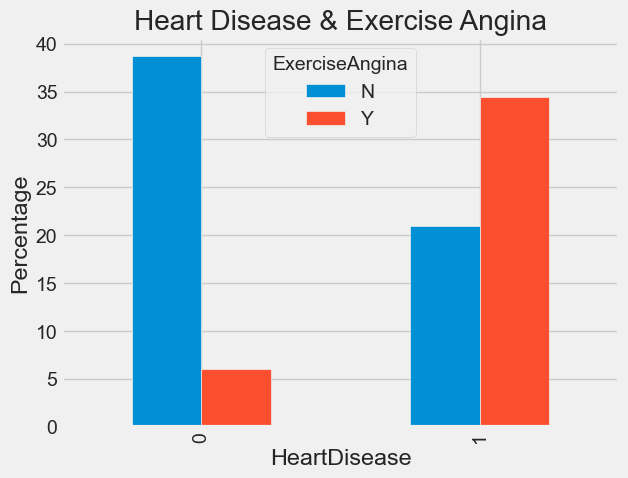

In [19]:
print(pd.crosstab(df['HeartDisease'], df['ExerciseAngina']))
print(pd.crosstab(df['HeartDisease'], df['ExerciseAngina'], normalize=True) * 100)

(pd.crosstab(df['HeartDisease'], df['ExerciseAngina'], normalize=True) * 100).plot.bar()
plt.ylabel('Percentage')
plt.title('Heart Disease & Exercise Angina')
plt.show()

Exercise induced Angina is more likely in records with heart disease than those without. The inverse is also true - the absence of exercise induced angina is more likely for records without heart disease than those with heart disease.

### Further EDA
Let's explore other groupings and/or visualizations of the data, in order to determine the following:
* What percentage of patients with heart disease are male and over 50 years old?
* What is the median age of patients who were diagnosed with heart disease?
* What is the correlation of numerical variables across the dataset?
* What is the relationship between Age and Maximum heart Rate

In [20]:
df_heart_disease = df.loc[df['HeartDisease'] == 1]
df_heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


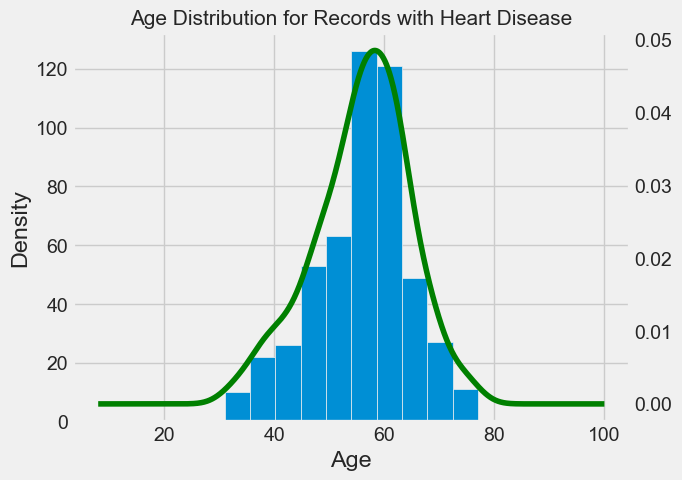

In [21]:
ax=df_heart_disease['Age'].plot.hist()
df_heart_disease['Age'].plot(kind='kde', ax=ax,
                             secondary_y=True, color='green')
ax.set_xlabel('Age')
plt.title('Age Distribution for Records with Heart Disease',
          size=15)
plt.show()

The age distribution for records with heart disease is slightly left skewed. Let's use the series.describe() method to check range and quartile distributions.

In [22]:
df_heart_disease['Age'].describe()

count    508.000000
mean      55.899606
std        8.727056
min       31.000000
25%       51.000000
50%       57.000000
75%       62.000000
max       77.000000
Name: Age, dtype: float64

In [23]:
df_heart_disease['Age'].mode()

0    58
Name: Age, dtype: int64

The age feature displays mean, median and mode from smallest to largest, i.e. 55, 57, 58. These values are close to each to reflect a near normal distribution, which we can see from our histogram. However, the values also reflect that the distribution might be slightly left skewed.

When a distribution is skewed to the left, the mean is often less than the median, i.e. to the left of the median on the x-axis. The mode value is also greater than the mean and median, i.e. to the right of them.

Analyzing the kde plot, the distribution seems more normal and the bulk of the distribution is between 40 and 70. This means that heart disease occurs mostly around this age.

We'll further segment the dataset by sex and age to determine the percentage of records with heart disease that are male and over 50.

In [24]:
df_heart_disease['Age'].value_counts(bins=[0,50,
                                           df_heart_disease['Age'].max()])

(50.0, 77.0]      383
(-0.001, 50.0]    125
Name: Age, dtype: int64

In [25]:
df_heart_disease.loc[(df_heart_disease['Sex'] == 'M') & (df_heart_disease['Age'] >= 50)].shape[0]

356

In [26]:
(df_heart_disease.loc[(df_heart_disease['Sex'] == 'M') & (df_heart_disease['Age'] >= 50)].shape[0] / df_heart_disease.shape[0]) * 100

70.07874015748031

In [27]:
(df_heart_disease.loc[(df_heart_disease['Sex'] == 'M') & (df_heart_disease['Age'] >= 50)].shape[0] /
 df_heart_disease.loc[df_heart_disease['Sex'] == 'M'].shape[0]) * 100

77.72925764192141

There are 356 records in the dataset for males over 50 with heart disease. As a proportion of the whole heart disease dataset, they account for 70%. As a proportion of males with heart disease, males over 50% account for 77%.

From the analysis above, we can surmise that men over 50 years are more likely to suffer from heart disease in the dataset. We've also found that the median age of patients with heart disease is 57 years.

Let's determine the relationship between age and maximum heart rate.

In [28]:
df['Age'].value_counts(bins=[df['Age'].min(),
                             df['Age'].median(),
                             df['Age'].max()])

(27.999, 54.0]    471
(54.0, 77.0]      447
Name: Age, dtype: int64

In [29]:
df['MaxHR'].value_counts(bins=[df['MaxHR'].min(),
                             df['MaxHR'].median(),
                             df['MaxHR'].max()])

(59.999, 138.0]    465
(138.0, 202.0]     453
Name: MaxHR, dtype: int64

We'll plot a scatter chart with a regression line to determine the nature of the relationship between Maximum Heart Rate and Age.

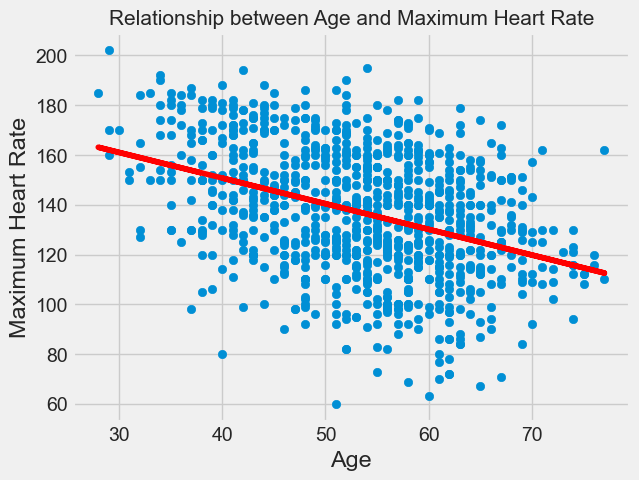

In [30]:
# Plot scatter chart
x = df['Age']
y = df['MaxHR']
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# add linear regression line to scatterplot
plt.title('Relationship between Age and Maximum Heart Rate',
          size=15)
plt.plot(x, m*x+b, color='red')

We can also plot this chart with seaborn, with less lines of code:

Text(0.5, 1.0, 'Relationship between Age and Maximum Heart Rate')

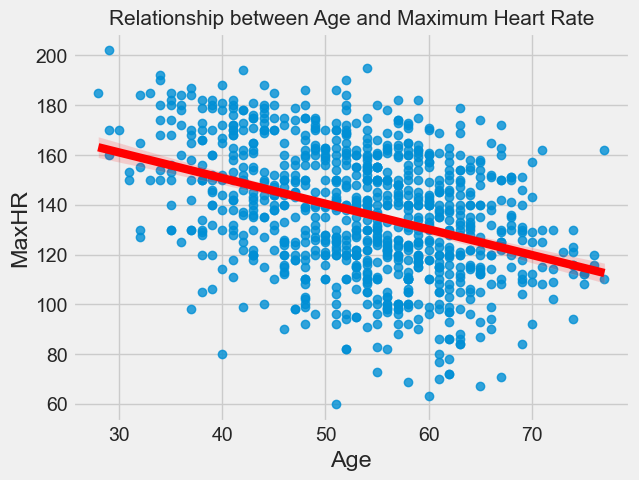

In [31]:
sns.regplot(x='Age', y='MaxHR', data=df, line_kws={'color':'red'})
plt.title('Relationship between Age and Maximum Heart Rate',
          size=15)

There is a negative correlation between age and max heart rate. The higher the age, the lower the heart rate and vice versa. Let's use color to segment the Heart Disease feature.

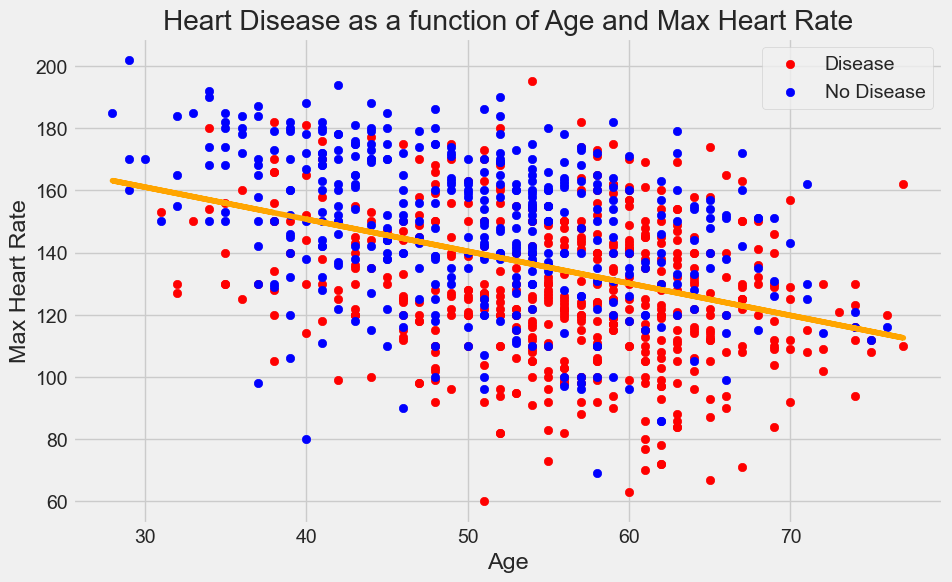

In [32]:
plt.figure(figsize=(10,6))

# Plot Records with Heart Disease
plt.scatter(df.Age[df.HeartDisease==1],
            df.MaxHR[df.HeartDisease==1],
            c="red") # define it as a scatter figure

# # Plot Records without Heart Diseases.
# We want them on the same plot, so we call plt again
plt.scatter(df.Age[df.HeartDisease==0],
            df.MaxHR[df.HeartDisease==0],
            c="blue") # axis always come as (x, y)

# Define and Plot Regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='orange')

# Title, Legends and Labels
plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

From the above scatter plot, we see that heart disease is represented on the lower right of the chart, i.e. higher ages and lower max heart rates.

Let's consider the MaxHR distribution for the entire dataset and the segment with heart disease.

Text(0.5, 0, 'Max Heart Rate')

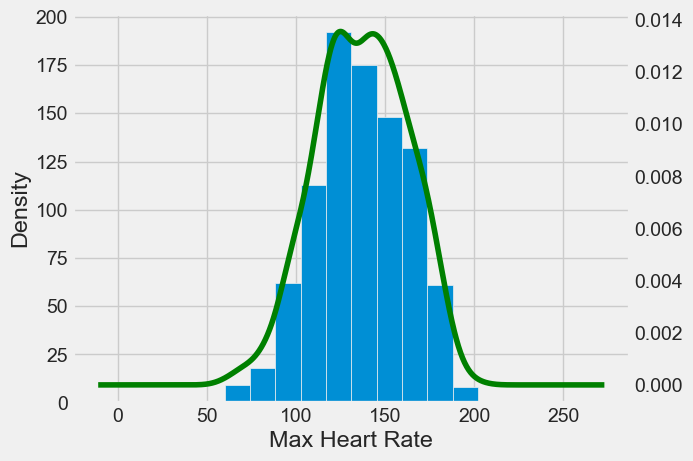

In [33]:
ax1 = df['MaxHR'].plot(kind='hist')
df['MaxHR'].plot(kind='kde', ax=ax1,
                 secondary_y=True, color='green')
ax1.set_xlabel('Max Heart Rate')

Text(0.5, 0, 'Max Heart Rate')

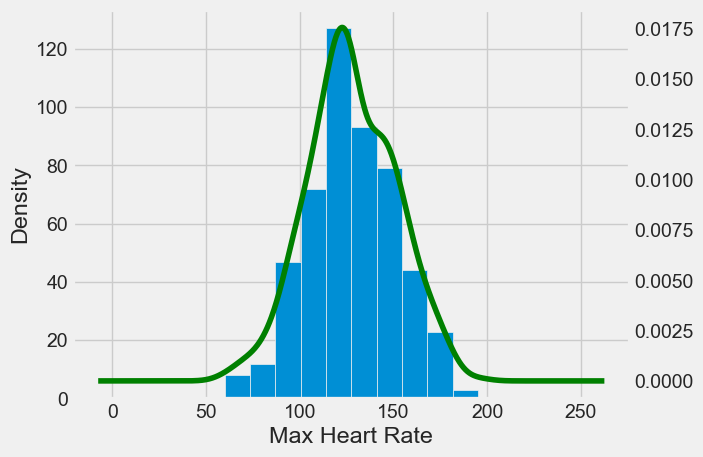

In [34]:
ax2 = df_heart_disease['MaxHR'].plot(kind='hist')
df_heart_disease['MaxHR'].plot(kind='kde', ax=ax2,
                 secondary_y=True, color='green')
ax2.set_xlabel('Max Heart Rate')

The distribution seems normal across both dataframes, however it is tighter for the heart disease dataframe.

Let's chart correlation between the numerical variables.

In [35]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


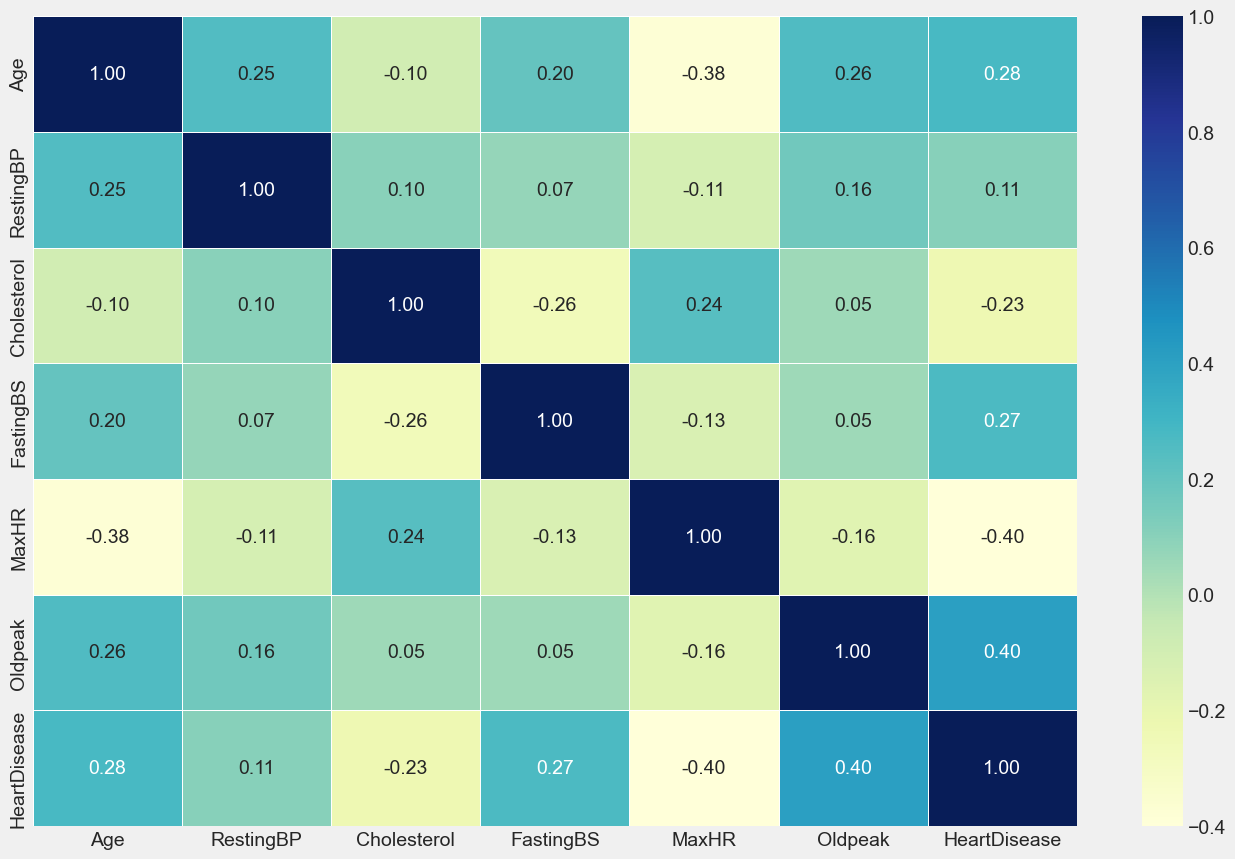

In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

### Data Cleaning
Previously, we calculated the number of missing values in our entire dataset and didn't find any. We also plotted our categorical columns and observed a few details:
* The dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.

* 410 patients were not diagnosed with heart disease, whereas 508 patients were. The target variable is somewhat evenly distributed, which is beneficial for training our model.

* A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, it should be noted that asymptomatic implies that those patients who had heart disease did not have chest pain as a symptom.

* A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not.

There are a lot of similar patterns that we can observe when we start grouping our data. These patterns can help us narrow down the features we want for training our model.

We'll begin by cleaning up the data. We identified that there are no missing values. However, as we noticed earlier, there are a few columns with inappropriate 0 values.

There are a few ways we can handle these values:
* We could remove those rows entirely if their frequency of occurrence is low.

* We could impute those zeros with the median value of that column or the median value of the column grouped by HeartDisease.

* We could try some complex approaches:
    * E.g., instead of using the median of the entire column, maybe we could look at the median of the values grouped by the age, sex, and/or resting ECG of the patient.

    * The resting blood pressure of a female in her 30s with a normal ECG might be lower than what we would get from the median of the entire column.

The third option might give us a slightly more accurate result, but given the small size of our dataset, we can ignore it for now. We'll identify how many of these values exist in our dataset and approach accordingly.

In [37]:
df.loc[df['RestingBP'] == 0].shape[0]

1

Since this is one record, we can drop it.

In [38]:
df.drop(df.loc[df['RestingBP'] == 0].index, inplace=True)
df.loc[df['RestingBP'] == 0].shape[0]

0

In [39]:
df.loc[df['Cholesterol'] == 0].shape[0]

171

Given the number of 0 values, we'll use the complex approach to fill the values. Let's group the dataset by Age, Sex and RestingECG, and then we'll find the median Cholesterol from this grouping.

First we'll determine the median cholesterol across the entire dataset.

In [40]:
df['Cholesterol'].median()

223.0

In [41]:
df_group = df.groupby(['Age', 'Sex', 'RestingECG']).agg({'Cholesterol':np.median}).reset_index()
df_group.head()

,Age,Sex,RestingECG,Cholesterol
0,28,M,LVH,132.0
1,29,M,LVH,204.0
2,29,M,Normal,253.0
3,30,F,ST,237.0
4,31,F,ST,219.0


Let's use these values to fill the 0 values.

In [42]:
df_cholesterol_zero = df.loc[df['Cholesterol'] == 0][['Age', 'Sex', 'RestingECG', 'Cholesterol']]
df_cholesterol_zero.head()

,Age,Sex,RestingECG,Cholesterol
293,65,M,Normal,0
294,32,M,Normal,0
295,61,M,Normal,0
296,50,M,Normal,0
297,57,M,ST,0


In [43]:
for index, row in df_cholesterol_zero.iterrows():
    for index1, row1 in df_group.iterrows():
        if (row['Age'] == row1['Age']) and (row['Sex'] == row1['Sex']) and (row['RestingECG'] == row1['RestingECG']):

            df.at[index, 'Cholesterol'] = row1['Cholesterol']
            df_cholesterol_zero.at[index, 'Cholesterol'] = row1['Cholesterol']

In [44]:
df_cholesterol_zero['Cholesterol'].value_counts()

0.0      17
101.5     8
217.5     7
177.0     6
182.0     6
         ..
55.0      1
273.0     1
224.0     1
239.5     1
246.0     1
Name: Cholesterol, Length: 65, dtype: int64

There are still 17 records with 0 values in the Cholesterol column. It is likely that these 17 records do not have similar values across the 3 featured variables. We'll consider the records for ages 38, 59, and 60 to determine which variable to drop.

In [45]:
df_group.loc[df_group['Age'] == 38]

,Age,Sex,RestingECG,Cholesterol
25,38,F,Normal,0.0
26,38,M,Normal,190.0


In [46]:
df_group.loc[df_group['Age'] == 59]

,Age,Sex,RestingECG,Cholesterol
131,59,F,Normal,218.5
132,59,F,ST,338.0
133,59,M,LVH,270.0
134,59,M,Normal,204.0
135,59,M,ST,0.0


In [47]:
df_group.loc[df_group['Age'] == 60]

,Age,Sex,RestingECG,Cholesterol
136,60,F,LVH,281.5
137,60,F,Normal,240.0
138,60,M,LVH,246.0
139,60,M,Normal,0.0
140,60,M,ST,186.0


From the analyses above, it seems that Sex is the differentiating variable, but we determined earlier in the analysis that it is an important feature, while RestingECG is not. Therefore, we'll drop RestingECG and conduct the iteration again.

We'll start by removing all non-zero values in the cholesterol dataframe.

In [48]:
df_cholesterol_zero.drop(index=df_cholesterol_zero.loc[df_cholesterol_zero['Cholesterol'] > 0].index, inplace=True)
df_cholesterol_zero

,Age,Sex,RestingECG,Cholesterol
300,60,M,Normal,0.0
303,62,F,ST,0.0
311,60,M,Normal,0.0
322,38,F,Normal,0.0
330,60,M,Normal,0.0
333,40,M,ST,0.0
370,60,M,Normal,0.0
375,73,F,ST,0.0
383,38,F,Normal,0.0
401,51,M,ST,0.0


In [49]:
for index, row in df_cholesterol_zero.iterrows():
    for index1, row1 in df_group.iterrows():
        if (row['Age'] == row1['Age']) and (row['Sex'] == row1['Sex']):

            df.at[index, 'Cholesterol'] = row1['Cholesterol']
            df_cholesterol_zero.at[index, 'Cholesterol'] = row1['Cholesterol']

In [50]:
df_cholesterol_zero.loc[df_cholesterol_zero['Cholesterol'] == 0]

,Age,Sex,RestingECG,Cholesterol
303,62,F,ST,0.0
322,38,F,Normal,0.0
333,40,M,ST,0.0
375,73,F,ST,0.0
383,38,F,Normal,0.0
401,51,M,ST,0.0
421,66,M,ST,0.0
427,59,M,ST,0.0
442,51,M,ST,0.0
455,59,M,ST,0.0


Only 7 rows fit the Age + Sex boolean mask. For this remainder, we'll use the general median cholesterol value.

In [51]:
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
303,62,F,ASY,120,0.0,1,ST,123,Y,1.7,Down,1
322,38,F,ASY,105,0.0,1,Normal,166,N,2.8,Up,1
333,40,M,ASY,95,0.0,1,ST,144,N,0.0,Up,1
375,73,F,NAP,160,0.0,0,ST,121,N,0.0,Up,1
383,38,F,ASY,110,0.0,0,Normal,156,N,0.0,Flat,1
401,51,M,ASY,130,0.0,1,ST,163,N,0.0,Flat,1
421,66,M,NAP,120,0.0,0,ST,120,N,-0.5,Up,0
427,59,M,ASY,140,0.0,0,ST,117,Y,1.0,Flat,1
442,51,M,ASY,128,0.0,1,ST,125,Y,1.2,Flat,1
455,59,M,ASY,154,0.0,0,ST,131,Y,1.5,Up,0


In [52]:
for index, row in df.iterrows():
    if row['Cholesterol'] == 0:
        df.at[index, 'Cholesterol'] = df['Cholesterol'].median()

In [53]:
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [54]:
df['Cholesterol'].value_counts()

226.0    21
186.0    16
204.0    15
254.0    12
177.0    12
         ..
239.5     1
358.0     1
344.0     1
347.0     1
131.0     1
Name: Cholesterol, Length: 246, dtype: int64

### Feature Selection
Now that we've cleaned our data, we can select features for our model. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:
* Age
* Sex
* ChestPainType
* Cholesterol
* FastingBS

We'll also explore how the columns correlate to one another. Before we attempt that, we'll convert our categorical columns into dummy variables.

We'll create a copy df for a secondary correlation analysis.

In [55]:
df_1 = df.copy()

#### First Correlation Analysis
We'll convert features with only 2 unique records into dummies using lambda and then use dummies for the categorical variables with multiple unique records.

In [56]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'M' else 0)
df['ExerciseAngina'] = df['ExerciseAngina'].apply(lambda x: 1 if x == 'Y' else 0)
df['ST_Slope'] = df['ST_Slope'].apply(lambda x: 1 if x == 'Up' else 0)
df['RestingECG'] = df['RestingECG'].apply(lambda x: 1 if x == 'ST' else 0)

In [57]:
df[categorical_features].head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,HeartDisease
0,1,ATA,0,0,0,0
1,0,NAP,0,0,0,1
2,1,ATA,0,1,0,0
3,0,ASY,0,0,1,1
4,1,NAP,0,0,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    int64  
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    int64  
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    int64  
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 125.4+ KB


In [59]:
df = pd.get_dummies(data=df, columns=['ChestPainType'],
               drop_first=True)

Having encoded the categorical variables, we will now prepare a correlation table and map. to determine which variables are correlated with Heart Disease.

In [60]:
df.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
Age,1.000000,0.055670,0.263084,-0.043878,0.198170,0.136903,-0.382280,0.216017,0.258563,-0.258027,0.282012,-0.218113,-0.011681,0.032083
Sex,0.055670,1.000000,0.009427,-0.169574,0.120424,0.064009,-0.189668,0.191226,0.105444,-0.150537,0.305118,-0.161294,-0.067682,-0.003903
RestingBP,0.263084,0.009427,1.000000,0.085589,0.067823,0.089156,-0.109693,0.153064,0.174252,-0.105969,0.117990,-0.051374,-0.027536,0.049464
Cholesterol,-0.043878,-0.169574,0.085589,1.000000,-0.058140,-0.073250,0.126909,0.033184,0.056908,-0.021793,-0.026918,0.045528,-0.044060,-0.009887
FastingBS,0.198170,0.120424,0.067823,-0.058140,1.000000,0.126853,-0.131067,0.059988,0.053062,-0.162346,0.267994,-0.140844,-0.038201,0.026752
RestingECG,0.136903,0.064009,0.089156,-0.073250,0.126853,1.000000,-0.157561,0.106649,0.056283,-0.059433,0.103067,-0.046381,-0.041317,-0.011736
MaxHR,-0.382280,-0.189668,-0.109693,0.126909,-0.131067,-0.157561,1.000000,-0.370023,-0.161213,0.384339,-0.401410,0.254214,0.133411,0.100235
ExerciseAngina,0.216017,0.191226,0.153064,0.033184,0.059988,0.106649,-0.370023,1.000000,0.409494,-0.456814,0.495490,-0.300947,-0.164722,-0.128362
Oldpeak,0.258563,0.105444,0.174252,0.056908,0.053062,0.056283,-0.161213,0.409494,1.000000,-0.450299,0.403638,-0.261903,-0.107615,0.032382
ST_Slope,-0.258027,-0.150537,-0.105969,-0.021793,-0.162346,-0.059433,0.384339,-0.456814,-0.450299,1.000000,-0.621843,0.357324,0.095585,0.001870


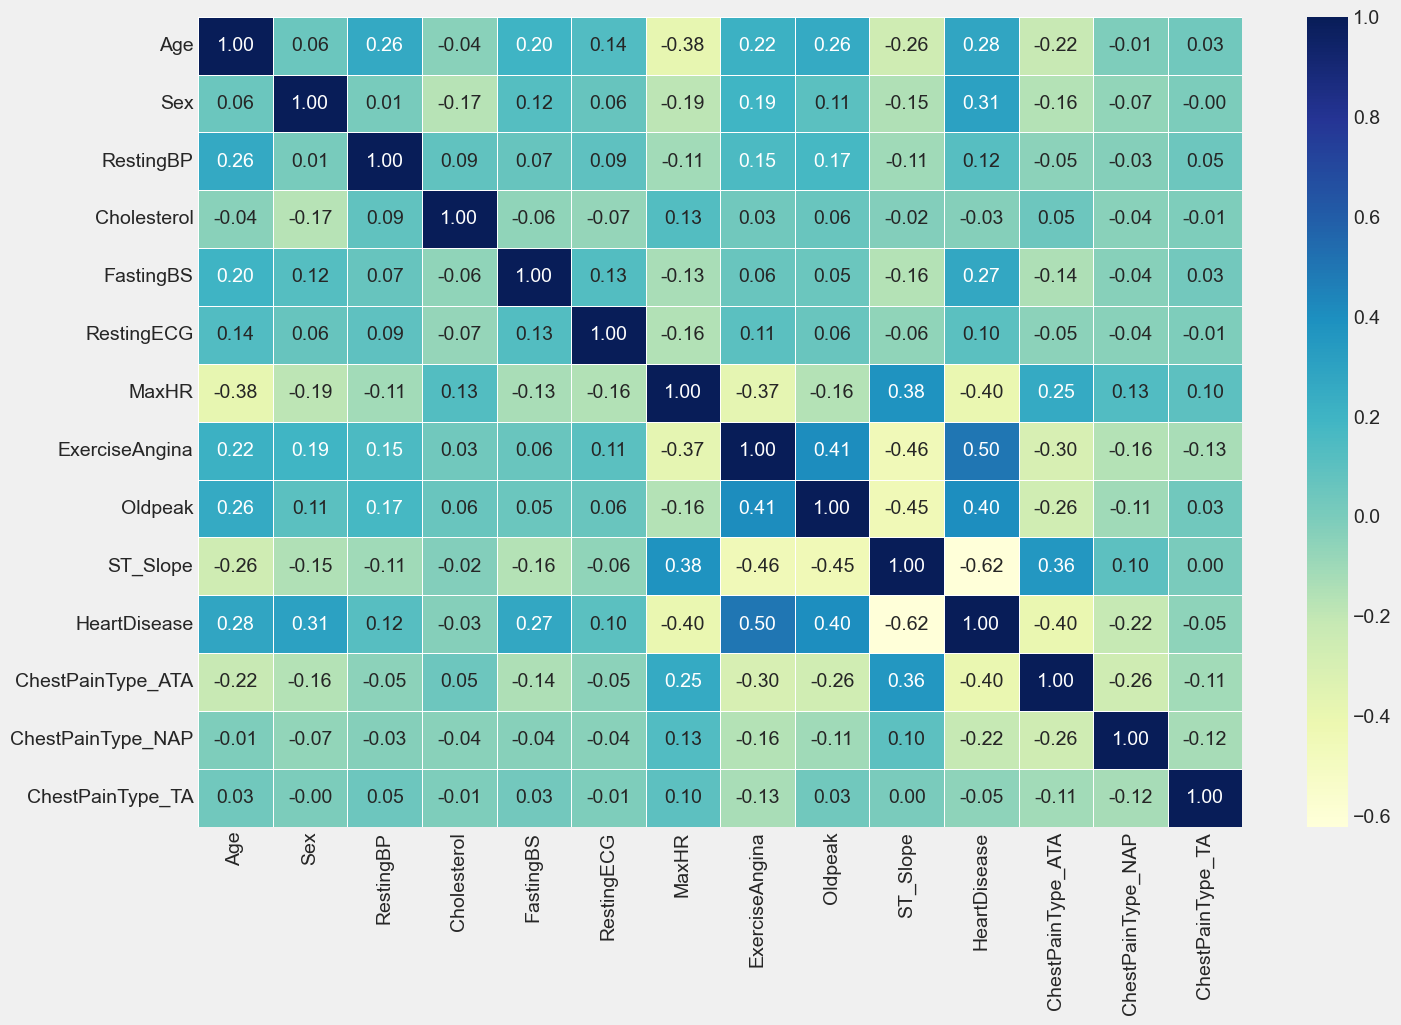

In [61]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt= ".2f",
            cmap="YlGnBu");

The following features are correlated with heart disease:
* MaxHR
* ChestPainType_ATA
* Oldpeak
* ExerciseAngina
* ST_Slope

The following features are only slightly correlated with heart disease:
* ChestPainType_NAP
* FastingBS
* Age
* Sex

The following features are not correlated with heart disease:
* RestingBP
* Cholesterol
* RestingECG
* ChestPainType_TA

Let's attempt to select features using the square of the Pearson correlation coefficient instead.

In [62]:
df.corr() ** 2

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
Age,1.000000,0.003099,0.069213,0.001925,0.039271,0.018742,0.146138,0.046664,0.066855,0.066578,0.079531,0.047573,0.000136,0.001029
Sex,0.003099,1.000000,0.000089,0.028755,0.014502,0.004097,0.035974,0.036567,0.011119,0.022661,0.093097,0.026016,0.004581,0.000015
RestingBP,0.069213,0.000089,1.000000,0.007325,0.004600,0.007949,0.012033,0.023429,0.030364,0.011230,0.013922,0.002639,0.000758,0.002447
Cholesterol,0.001925,0.028755,0.007325,1.000000,0.003380,0.005366,0.016106,0.001101,0.003239,0.000475,0.000725,0.002073,0.001941,0.000098
FastingBS,0.039271,0.014502,0.004600,0.003380,1.000000,0.016092,0.017179,0.003599,0.002816,0.026356,0.071821,0.019837,0.001459,0.000716
RestingECG,0.018742,0.004097,0.007949,0.005366,0.016092,1.000000,0.024826,0.011374,0.003168,0.003532,0.010623,0.002151,0.001707,0.000138
MaxHR,0.146138,0.035974,0.012033,0.016106,0.017179,0.024826,1.000000,0.136917,0.025989,0.147717,0.161130,0.064625,0.017798,0.010047
ExerciseAngina,0.046664,0.036567,0.023429,0.001101,0.003599,0.011374,0.136917,1.000000,0.167685,0.208679,0.245510,0.090569,0.027133,0.016477
Oldpeak,0.066855,0.011119,0.030364,0.003239,0.002816,0.003168,0.025989,0.167685,1.000000,0.202769,0.162924,0.068593,0.011581,0.001049
ST_Slope,0.066578,0.022661,0.011230,0.000475,0.026356,0.003532,0.147717,0.208679,0.202769,1.000000,0.386688,0.127680,0.009136,0.000003


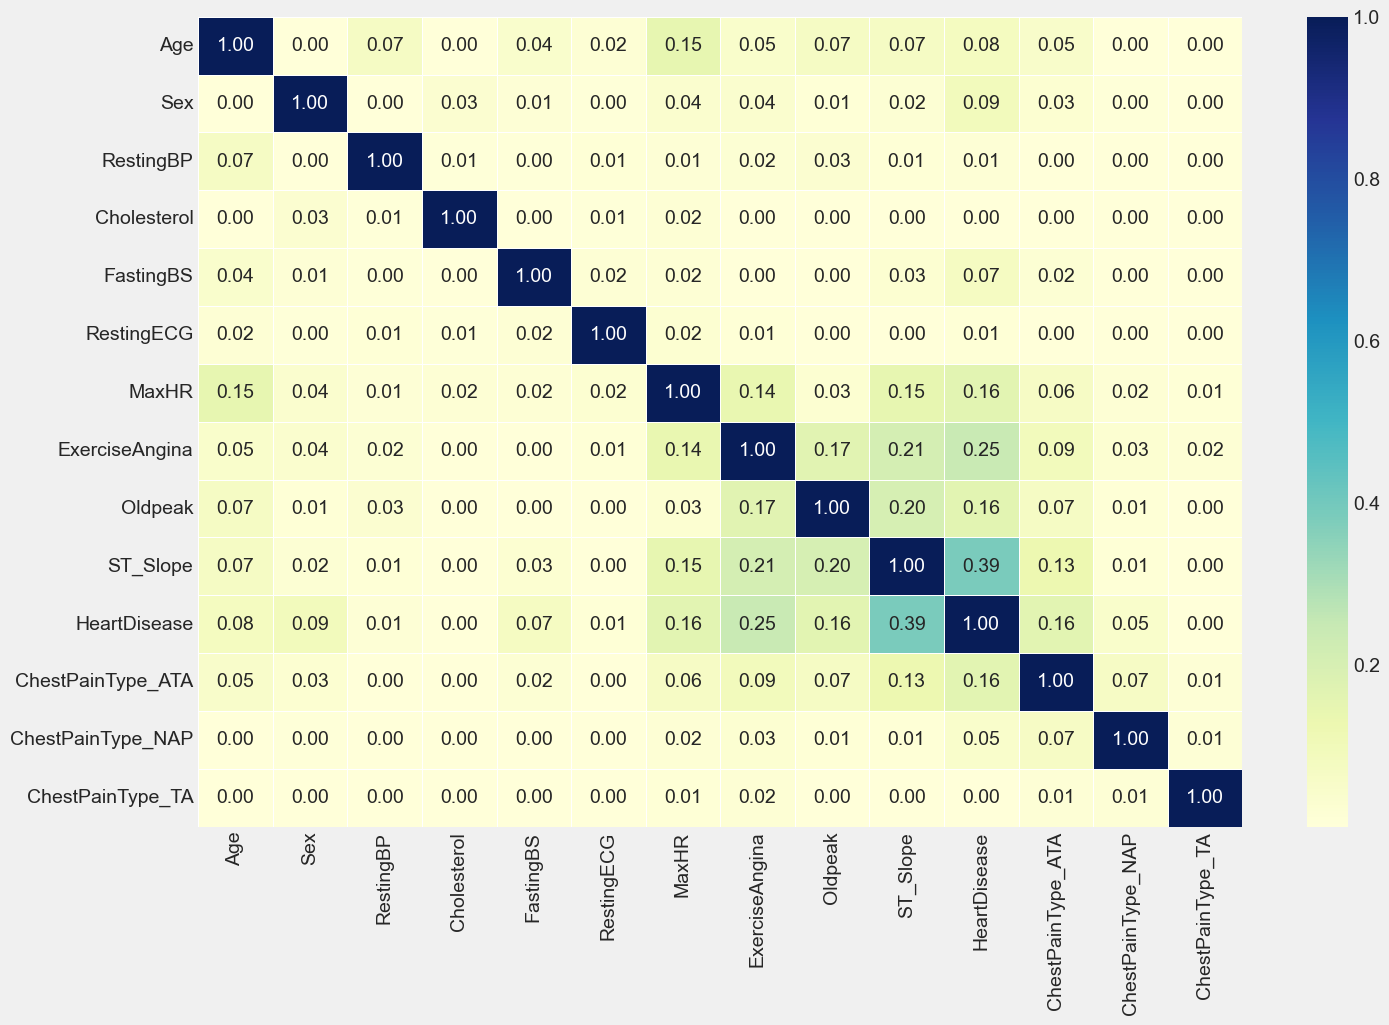

In [63]:
corr_matrix_square = df.corr() ** 2
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_square, annot=True,
            linewidths=0.5, fmt= ".2f",
            cmap="YlGnBu");

When squared, negative correlations are lost. This may not be helpful for correlation analysis. However, when squared, ST_Slope and Exercise Angina are still correlated with heart disease. MaxHR, ChestPainType_ATA and Oldpeak are also more closely correlated with Heart Disease than other features.

This confirms the previous analysis.

#### Second Correlation Analysis
We'll use dummies on all categorical variables. This will provide clarity on which unique records within all categorical variables are correlated with heart disease.

In [64]:
df_1 = pd.get_dummies(data=df_1, drop_first=True)
df_1.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.263084,-0.043878,0.198170,-0.382280,0.258563,0.282012,0.055670,-0.218113,-0.011681,0.032083,-0.230793,0.136903,0.216017,0.185499,-0.258027
RestingBP,0.263084,1.000000,0.085589,0.067823,-0.109693,0.174252,0.117990,0.009427,-0.051374,-0.027536,0.049464,-0.113759,0.089156,0.153064,0.110171,-0.105969
Cholesterol,-0.043878,0.085589,1.000000,-0.058140,0.126909,0.056908,-0.026918,-0.169574,0.045528,-0.044060,-0.009887,-0.047360,-0.073250,0.033184,0.037109,-0.021793
FastingBS,0.198170,0.067823,-0.058140,1.000000,-0.131067,0.053062,0.267994,0.120424,-0.140844,-0.038201,0.026752,-0.092588,0.126853,0.059988,0.107683,-0.162346
MaxHR,-0.382280,-0.109693,0.126909,-0.131067,1.000000,-0.161213,-0.401410,-0.189668,0.254214,0.133411,0.100235,0.023181,-0.157561,-0.370023,-0.343641,0.384339
Oldpeak,0.258563,0.174252,0.056908,0.053062,-0.161213,1.000000,0.403638,0.105444,-0.261903,-0.107615,0.032382,-0.117293,0.056283,0.409494,0.282874,-0.450299
HeartDisease,0.282012,0.117990,-0.026918,0.267994,-0.401410,0.403638,1.000000,0.305118,-0.401680,-0.215311,-0.054591,-0.092452,0.103067,0.495490,0.553700,-0.621843
Sex_M,0.055670,0.009427,-0.169574,0.120424,-0.189668,0.105444,0.305118,1.000000,-0.161294,-0.067682,-0.003903,-0.011098,0.064009,0.191226,0.115596,-0.150537
ChestPainType_ATA,-0.218113,-0.051374,0.045528,-0.140844,0.254214,-0.261903,-0.401680,-0.161294,1.000000,-0.256306,-0.110817,0.108422,-0.046381,-0.300947,-0.304346,0.357324
ChestPainType_NAP,-0.011681,-0.027536,-0.044060,-0.038201,0.133411,-0.107615,-0.215311,-0.067682,-0.256306,1.000000,-0.122150,0.003352,-0.041317,-0.164722,-0.074256,0.095585


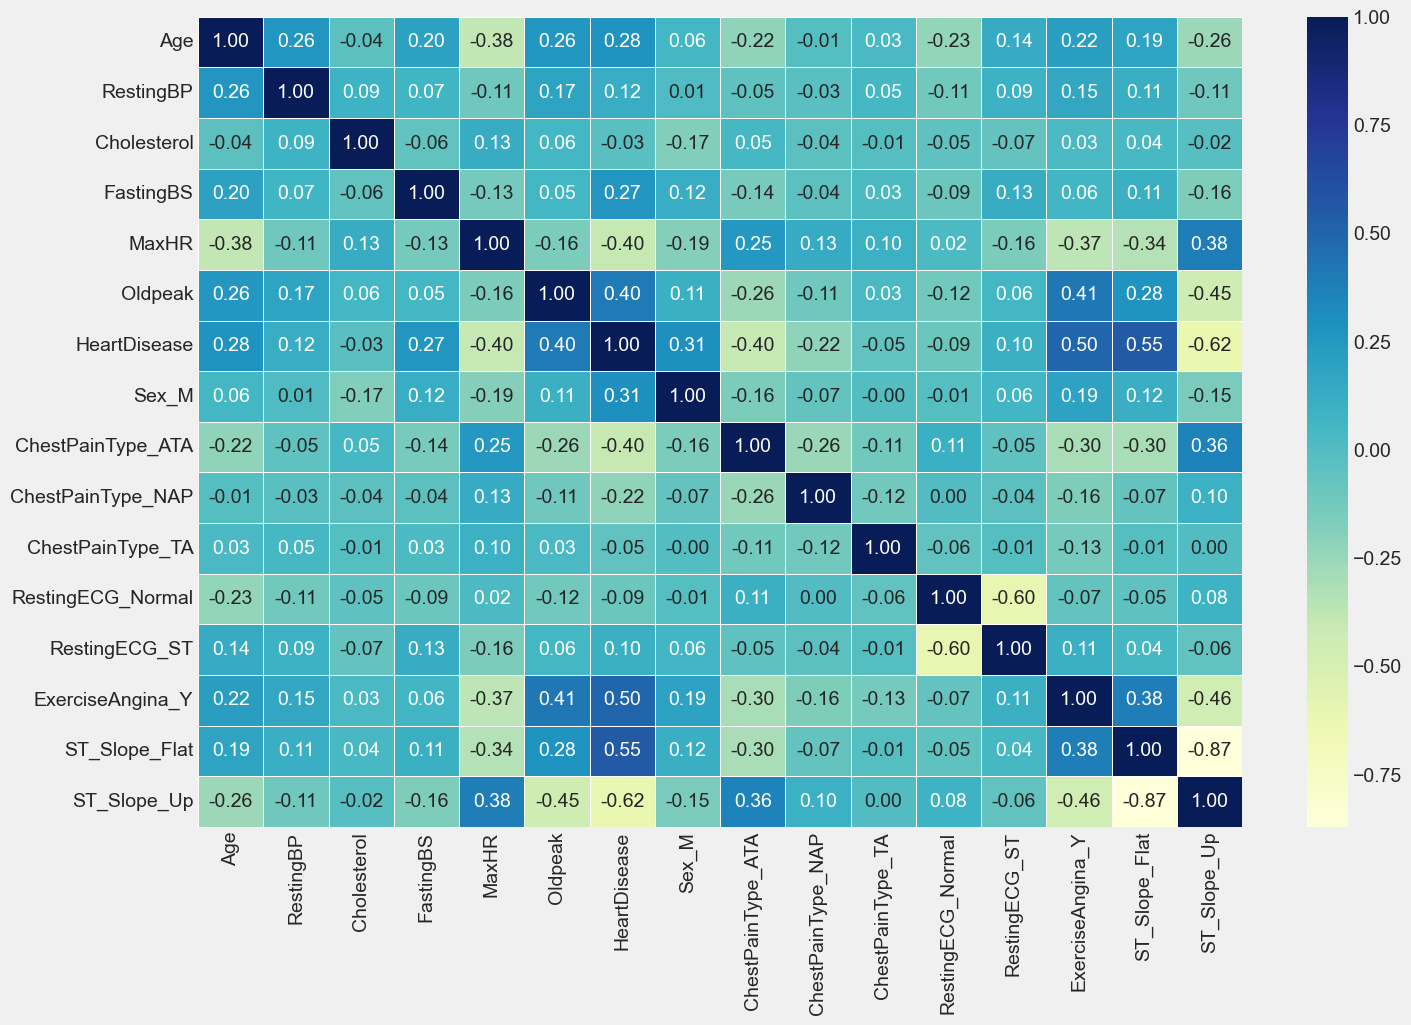

In [65]:
corr_matrix_1 = df_1.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_1, annot=True, linewidths=0.5, fmt= ".2f",
            cmap="YlGnBu");

Under this analysis the following features are correlated with heart disease:
* MaxHR
* Oldpeak
* Sex_M
* ChestPainType_ATA
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

This confirms the analysis above.

### Building a Classifier I
If we choose a correlation coefficient threshold of 0.3, we can identify the following features as correlated with heart disease:
* MaxHR
* Oldpeak
* Sex_M
* ChestPainType_ATA
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

Next, we will create and train multiple models using one of those features at a time.

First, we'll split the dataset into training and validation sets.

In [68]:
X = df_1.drop(['HeartDisease'], axis=1)
y = df_1['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2,
                                                  random_state=417)

In [67]:
# Create a list that contains your selected features as strings.
features = ['MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA',
            'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

neighbors = list(range(1, 11))

In [74]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
645,57,128,229.0,0,150,0.4,1,0,1,0,0,0,0,1,0
149,54,130,603.0,1,125,1.0,1,0,0,0,1,0,1,1,0
143,53,140,243.0,0,155,0.0,1,0,0,0,1,0,0,0,1
42,35,150,264.0,0,168,0.0,1,1,0,0,1,0,0,0,1
847,45,115,260.0,0,185,0.0,1,0,0,0,0,0,0,0,1


In [97]:
accuracies = dict()
for feature in features:
    for neighbor in neighbors:
        knn = KNeighborsClassifier(n_neighbors=neighbor)
        knn.fit(np.reshape(X_train[feature].values, (-1,1)), y_train)
        val_accuracy = knn.score(np.reshape(X_val[feature].values, (-1,1)), y_val)
        accuracies[feature, neighbor] = f'{val_accuracy * 100:.2f}%'

In [98]:
sorted(accuracies.items(), key=lambda x:x[1], reverse=True)

[(('ST_Slope_Up', 1), '80.98%'),
 (('ST_Slope_Up', 2), '80.98%'),
 (('ST_Slope_Up', 3), '80.98%'),
 (('ST_Slope_Up', 4), '80.98%'),
 (('ST_Slope_Up', 5), '80.98%'),
 (('ST_Slope_Up', 6), '80.98%'),
 (('ST_Slope_Up', 7), '80.98%'),
 (('ST_Slope_Up', 8), '80.98%'),
 (('ST_Slope_Up', 9), '80.98%'),
 (('ST_Slope_Up', 10), '80.98%'),
 (('ST_Slope_Flat', 1), '78.26%'),
 (('ST_Slope_Flat', 2), '78.26%'),
 (('ST_Slope_Flat', 3), '78.26%'),
 (('ST_Slope_Flat', 4), '78.26%'),
 (('ST_Slope_Flat', 5), '78.26%'),
 (('ST_Slope_Flat', 6), '78.26%'),
 (('ST_Slope_Flat', 7), '78.26%'),
 (('ST_Slope_Flat', 8), '78.26%'),
 (('ST_Slope_Flat', 9), '78.26%'),
 (('ST_Slope_Flat', 10), '78.26%'),
 (('ExerciseAngina_Y', 3), '71.20%'),
 (('ExerciseAngina_Y', 4), '71.20%'),
 (('ExerciseAngina_Y', 5), '71.20%'),
 (('ExerciseAngina_Y', 6), '71.20%'),
 (('ExerciseAngina_Y', 7), '71.20%'),
 (('ExerciseAngina_Y', 8), '71.20%'),
 (('ExerciseAngina_Y', 9), '71.20%'),
 (('ExerciseAngina_Y', 10), '71.20%'),
 (('Oldpeak',

From our accuracies' dictionary, the features with the highest accuracy, along with neighbors are:
* ST_Slope_Up - 80.98% (neighbors:1-10)
* ST_Slope_Flat - 78.26% (neighbors:1-10)
* ExerciseAngina_Y - 71.20% (neighbors:3-10)
* Oldpeak - 70.65% (neighbors:9)
* ChestPainType_ATA - 70.65% (neighbors:1-3, 9)
* Sex_M - 65.76% (neighbors:7-10)
* Max_HR - 61.96% (neighbors:3,5,9)

The neighbour with the highest representation is 9.

### Building a Classifier II
Next, we'll train a model on all of these features together.

Before we do, it's important to note that our features are not yet normalized. Not all the values are within the same range. We will first scale our data to the range (0, 1) before training our model. Note: We will only scale our selected features.

In [101]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

In [102]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
val_accuracy = knn.score(X_val_scaled, y_val)

print(f'Model Accuracy with ALL Features is: {val_accuracy * 100:.2f}%')

Model Accuracy with ALL Features is: 83.70%


When using all features, the accuracy rate increases by 3% as against the highest single feature model. The accuracy of the combined features model is 83.70%.

### Hyperparameter Tuning
Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use GridSearchCV to search over those values.

GridSearchCV, allows us to search over all the parameters for our classifier in scikit-learn. For example, for the KNeighborsClassifier we can choose to experiment with the following:
* n_neighbors,
* weights,
* metric and more.

Additionally, since GridSearchCV creates a validation set as part of its process, we'll have to update our workflow a bit.

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=417)

In [105]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

In [116]:
knn = KNeighborsClassifier()
grid_params = {"n_neighbors": range(1, 10),
               "metric": ["minkowski", "manhattan", 'euclidean', 'cosine', 'jaccard']}

knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
best_score = knn_grid.best_score_
best_params = knn_grid.best_params_
print(f"Best model's accuracy: {best_score*100:.2f}%")
print(f"Best model's parameters: {best_params}")

Best model's accuracy: 83.07%
Best model's parameters: {'metric': 'manhattan', 'n_neighbors': 5}


The model accuracy drops slightly to 83.07%. The most accurate distance metric is the Manhattan Distance which calculates the distance between two points as the sum of the absolute differences of their Cartesian coordinates.

Note that Euclidean distance is the most widely used one, and it is the default metric that Sci-Kit learn uses for K-Nearest Neighbour. It is a measure of the true straight line distance between two points in Euclidean space. This may reflect the difference in accuracy.

Let's increase neighbour range to 30 and consider the difference if any.

In [117]:
knn=KNeighborsClassifier()
grid_params = {"n_neighbors": range(1, 30),
               "metric": ["minkowski", "manhattan", 'euclidean', 'cosine', 'jaccard']}

knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
best_score = knn_grid.best_score_
best_params = knn_grid.best_params_
print(f"Best model's accuracy: {best_score*100:.2f}%")
print(f"Best model's parameters: {best_params}")

Best model's accuracy: 84.44%
Best model's parameters: {'metric': 'minkowski', 'n_neighbors': 20}


### Model Evaluation on Test Set
Using GridSearchCV, our best model had an accuracy of 84.44% with 20 n_neighbors and minkowski as the distance metric. The accuracy of this model is only slightly better than the one without tuned hyperparameters.

We'll now evaluate this model on our test set. We've already normalized our test set above.

In [119]:
accuracy = knn_grid.best_estimator_.score(X_test_scaled, y_test)
print(f"Best model's accuracy: {accuracy*100:.2f}%")

Best model's accuracy: 85.33%


The model is slightly more accurate on the test set - 85.33%. Our result above raises a question, however. How can the model perform better on the test set compared to the validation set?

One explanation comes from looking at how the data is distributed. We used Sex as one of our features for training the model.
* X had 724 males and 193 females.
* X_train had 580 males and 153 females.
* X_test had 144 males and 40 females.

We can see that the above datasets have a significantly higher number of male patients than female ones. This imbalance could present a bias in our dataset, and we can see that it potentially impacts our model. If the test dataset doesn't have many female patients and the model was trained on a dataset with more male patients, then it is understandable that the test set has better accuracy.

### Next Steps
While we can't always do something about the kind of data we get to work with, we do have the option of experimenting further and improving upon our model.

For next steps, we could:
* Experiment with different parameters and hyperparameters.
* Experiment with the random_state value might
* Explore and use different features to train the model.
* What would happen if we were to use ALL the features in our dataset?